In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path)

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,
Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


In [3]:
timestamps_exp = [['2024-10-16 10:45:00', '2024-10-16 12:26:00'],
                  ['2024-10-16 15:00:00', '2024-10-16 15:34:00'],
                  ['2024-10-17 10:20:00', '2024-10-17 12:00:00'],
                  ['2024-10-17 14:30:00', '2024-10-17 15:00:00']]

ax_labels = ['Particle diameter / $\mu$m', 'Number concentration / #/cm$^{3}$', 'Mass concentration / $\mu$g/m$^{3}$']

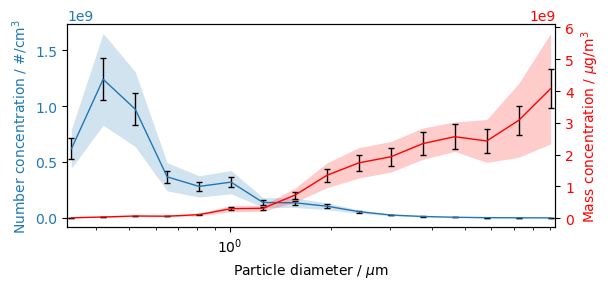

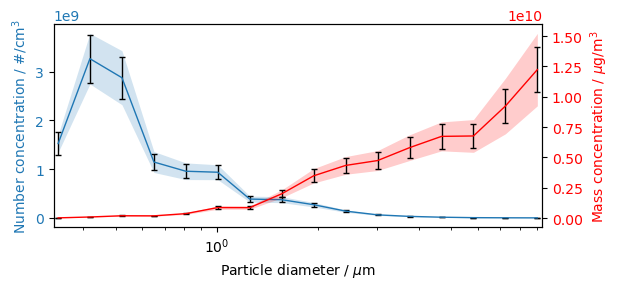

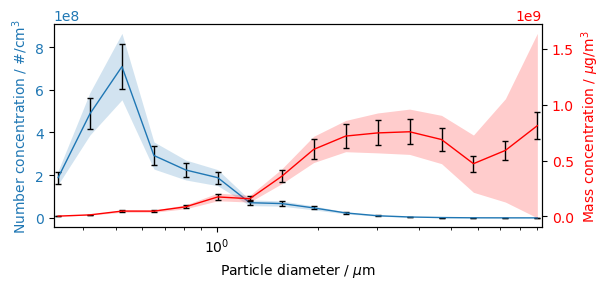

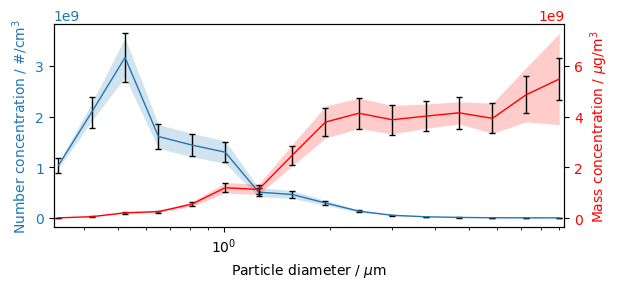

In [11]:
OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_bins = OPS_APS['Exp1'].keys()[1:17].to_list()

OPS_mass_conc = {}
for key in OPS_dict_keys:
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_bins, OPS_cut_point, OPS_mid_point, 7.86)
    OPS_mass_conc[key] = mass_conc
    
for i, key in enumerate(OPS_dict_keys):
    fig_name = 'Mean_concentrations/OPS_mean_' + key + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_bin_mean(ax, timestamps_exp[i], OPS_APS[key], OPS_mass_conc[key], OPS_bins, 'Time', OPS_mid_point, ['tab:blue', 'red'], 0.15, ax_labels, mass = True)

    ax.set_xlim(min(OPS_mid_point) - 0.01, max(OPS_mid_point) + 0.3)

    fig.tight_layout()
    fig.savefig(fig_name, dpi = 600)

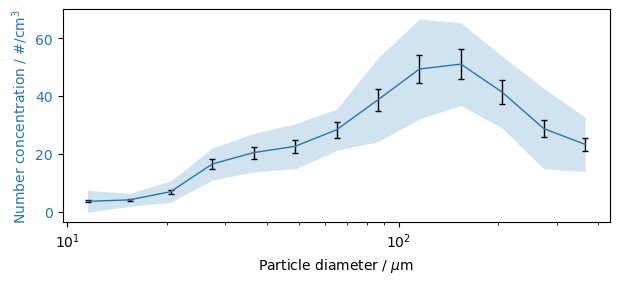

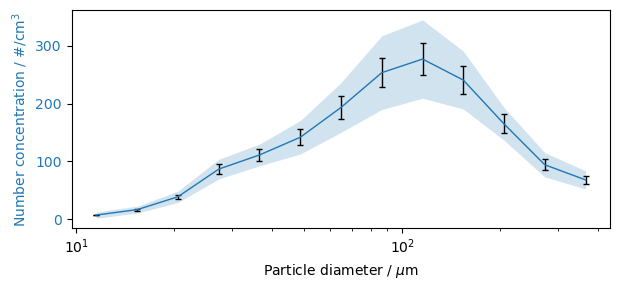

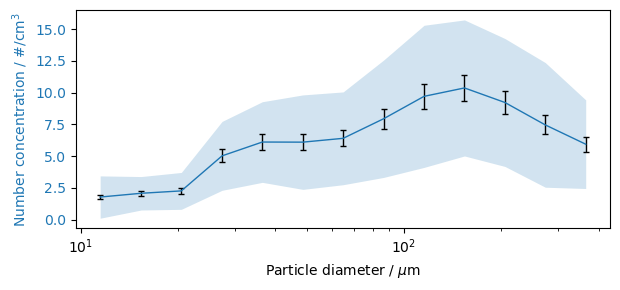

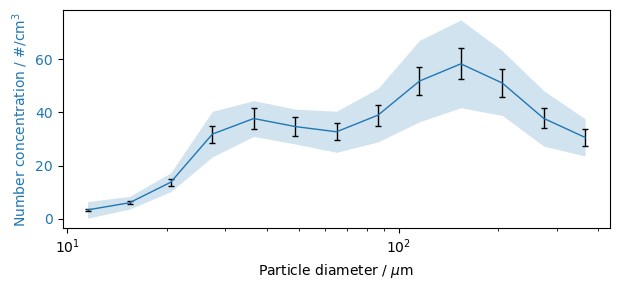

In [10]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key))
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()

for i, key in enumerate(NanoScan_dict_keys):
    exp_number = i + 1
    fig_name = 'Mean_concentrations/NanoScan_mean_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_bin_mean(ax, timestamps_exp[i], SMPS[key], None, NanoScan_Bins, 'Time', NanoScan_bin_mean, ['tab:blue'], 0.10, ax_labels, mass = False)

    fig.tight_layout()
    fig.savefig(fig_name, dpi = 600)

In [32]:
def calc_mass_conc(df, df_keys, bin_cut_points, bin_mid_points, rho):
    bin_widths = []
    for i, bin in enumerate(bin_cut_points[:-1]):
        width = bin_cut_points[i+1] - bin
        bin_widths.append(width)
    
    new_df = pd.DataFrame({'Time': df['Time']})
    for i, key in enumerate(df_keys):
        # Ensure df[key] is numeric
        df[key] = pd.to_numeric(df[key], errors='coerce')
        
        n_M = (rho / 10**6) * (np.pi / 6) * bin_mid_points[i]**3 * df[key] # in ug * um**-1 * cm**-3
        mass_conc = n_M * bin_widths[i] * 10**6
        new_df[key] = mass_conc
    
    return new_df

In [44]:
def bin_edges(start, bin_means):
    edges = [start]
    for midpoint in bin_means:
        # Calculate the upper edge
        edge_upper = (midpoint ** 2) / edges[-1]
        
        # Ensure the edge is strictly increasing
        if edge_upper <= edges[-1]:
            edge_upper = edges[-1] * 1.01  # Increment slightly to ensure increasing sequence

        edges.append(edge_upper)
    return edges

In [6]:
APS_dict_keys = ['20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS'].keys()[5:56].to_list()
APS_bin_mean = []
for key in OPS_APS['20241016_APS'].keys()[5:56]:
    APS_bin_mean.append(float(key))
# APS_cut_point = bin_edges(0.500, APS_bin_mean)
# print(len(APS_cut_point))
# print(APS_cut_point)
# print(APS_bin_mean)

# APS_mass_conc = {}
# for key in APS_dict_keys:
#     mass_conc = calc_mass_conc(OPS_APS[key], APS_bins, APS_cut_point, APS_bin_mean, 7.86)
#     APS_mass_conc[key] = mass_conc

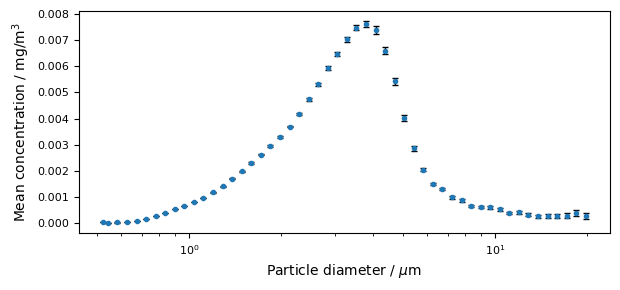

In [9]:
# fig_name = 'Mean_concentrations/APS_mean_' + 'Exp1' + '.png'

# fig, axes = plt.subplots(figsize = (6.3, 3))

# plot_bin_mean(axes, timestamps_exp[0], OPS_APS['20241016_APS'], APS_bins, 'Time', APS_bin_mean, ax_labels)

# fig.tight_layout()
# fig.savefig(fig_name, dpi = 600)

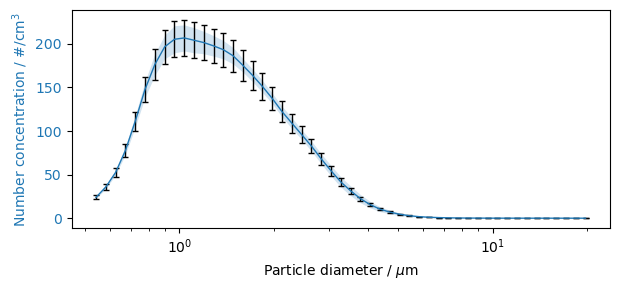

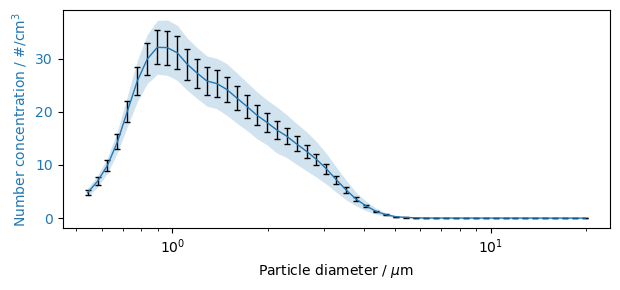

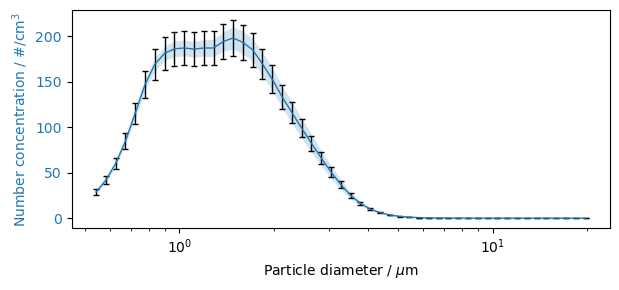

In [7]:
for i, key in enumerate(APS_dict_keys):
    exp_number = i + 2
    fig_name = 'Mean_concentrations/APS_mean_Exp' + str(exp_number) + '.png'

    fig, axes = plt.subplots(figsize = (6.3, 3))

    plot_bin_mean(axes, timestamps_exp[i+1], OPS_APS[key], None, APS_bins, 'Time', APS_bin_mean, ['tab:blue'], 0.10, ax_labels, mass = False)
    
    fig.tight_layout()
    fig.savefig(fig_name, dpi = 600)

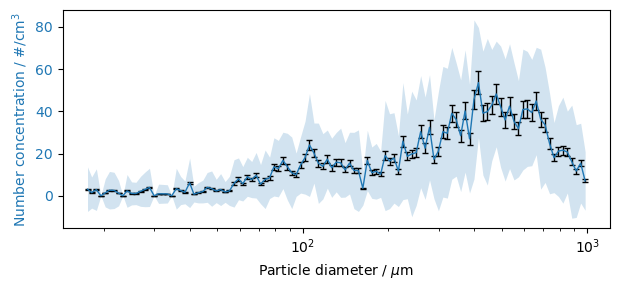

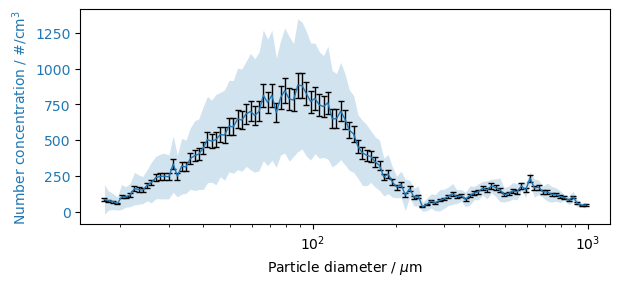

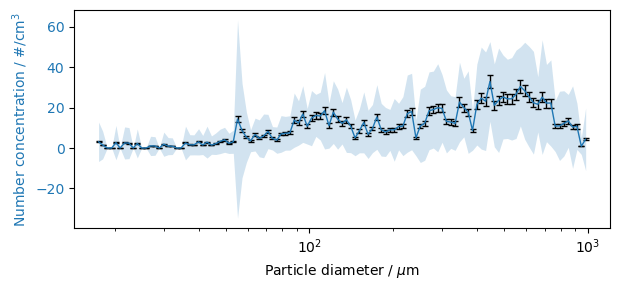

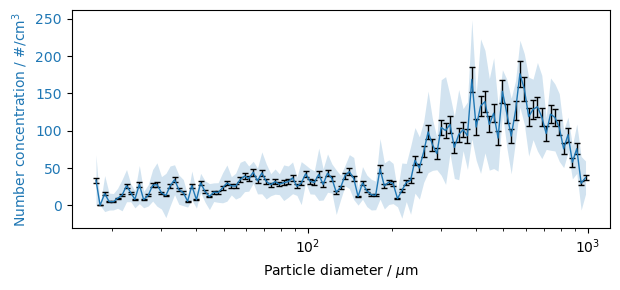

In [9]:
SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[83:196].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[83:196]:
    SMPS_bin_mean.append(float(key))


for i, key in enumerate(SMPS_dict_keys):
    exp_number = i + 1
    fig_name = 'Mean_concentrations/SMPS_mean_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_bin_mean(ax, timestamps_exp[i], SMPS[key], None, SMPS_bins, 'Time', SMPS_bin_mean, ['tab:blue'], 0.10, ax_labels, mass = False)

    fig.tight_layout()
    fig.savefig(fig_name, dpi = 600)